Hola Rafael!

Mi nombre es Miguel Gutierrez y revisare tu proyecto ! Para darte un contexto, trabajo como cientifico de datos en Mercado Libre. Asi que seras revisado por alguien que aplica a diario todo este tipo de tecnicas en su vida laboral ! Espero una vez finalizes este bootcamp, tambien lo apliques ! Buena suerte !

Cuando vea un error la primera vez, lo señalare. Dejare que encuentres la solucion. Tambien en el texto hare algunas observaciones de como podrias mejorar el codio y tambien hare comentarios de tus percepciones sobre el tema. Si no pueds manejar la tarea, te dare una pista precisa en la siguiente iteraciones y algunos ejemplos practicos. Estare abierto a cualquierda duda y discusion respecto al tema. En general los comentarios de advertencia tu decides si tomarlos o no. No es necesario que acates todos los cambios de advertencia.

Encontraras mis comentarios en el siguiente formato - *Por favor no mueves, modifiques o elimines los comentarios*.

Podras encontrar mis comentarios en verde, amarillo o rojo como estos:


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente. Todo esta perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Comentarios. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Necesita ser arreglado. El bloque requiere algunas correciones. El trabajo no podra ser acceptado si tiene comentarios en rojo.
</div>

Puedes responderme utilizando este tipo de comentario:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Buen dia revisor, por alguna extraña razon no me deja cargar los datos labels -**[Errno 13] Permission denied: '/datasets/faces/labels.csv'**- y por consiguiente no se reflejan los resultados, sin embargo, ya habia realizado el analisis previamente y funcionaba correctamente.

Las conclusiones se encuentran en la parte correspondiente.

De igual forma se realizo el analisis en GPU de entrenamiento del modelo, y los resultados se encuentran en la parte correspondiente, ya contacte con soporte para la solucion de este problema. 

## Inicialización

In [3]:
#Cargamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [4]:
# Cargamos el archivo labels
labels = pd.read_csv('/datasets/faces/labels.csv')

## EDA

In [5]:
# Checamos los datos de forma general
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [6]:
# Verificamos los tipos de datos
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [7]:
# Verificamos duplicados
labels.duplicated().sum()

0

In [8]:
# Verificamos valores ausentes
labels.isna().sum()

file_name    0
real_age     0
dtype: int64

In [9]:
# Verificamos los valores de los datos
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<AxesSubplot:>

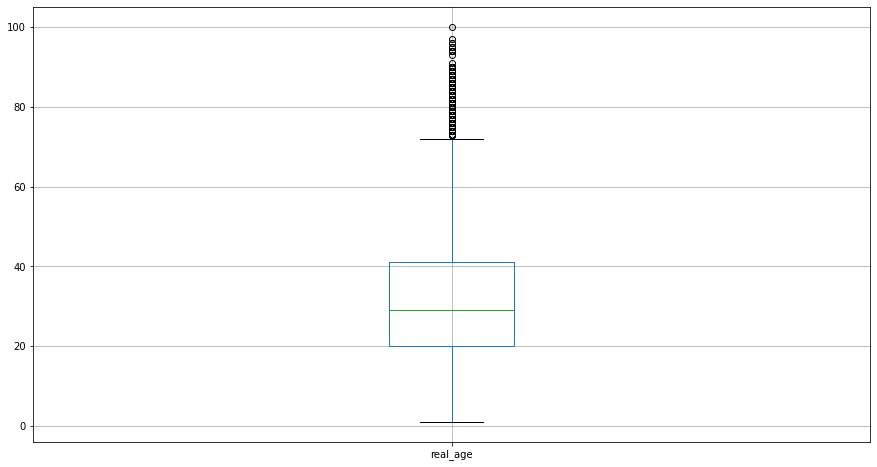

In [10]:
# Analizamos si hay posibles outliers
labels.boxplot(figsize=(15,8))

In [11]:
print('Tenemos un porcentaje de:',round(sum(labels['real_age'] > 80)/len(labels['real_age'])*100,2),'valores que podrian afectar nuestra muestra en valores mayores a 80 años')
print('Tenemos un porcentaje de:',round(sum(labels['real_age'] < 10)/len(labels['real_age'])*100,2),'valores que podrian afectar nuestra muestra en valores menores a 10 años')

Tenemos un porcentaje de: 1.07 valores que podrian afectar nuestra muestra en valores mayores a 80 años
Tenemos un porcentaje de: 8.73 valores que podrian afectar nuestra muestra en valores menores a 10 años


Tenemos valores los cuales son poco probables que sean reales, como personas que realicen compras mayores de 80 años y personas menores a 10 años, imprimeremos una muestra para ver que efectivamente puedan corresponder a esas edades.

In [12]:
# Creamos un datasets con cada tipo de edad
mayores = labels[labels['real_age'] > 80].reset_index(drop=True)
menores = labels[labels['real_age'] < 10].reset_index(drop=True)

### Fotos personas mayores 80 años 

In [13]:
datagen = ImageDataGenerator(rescale=1./255)

In [14]:
mayores_flow = datagen.flow_from_dataframe(
        dataframe=mayores,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 81 validated image filenames.


In [15]:
features, target = next(mayores_flow)

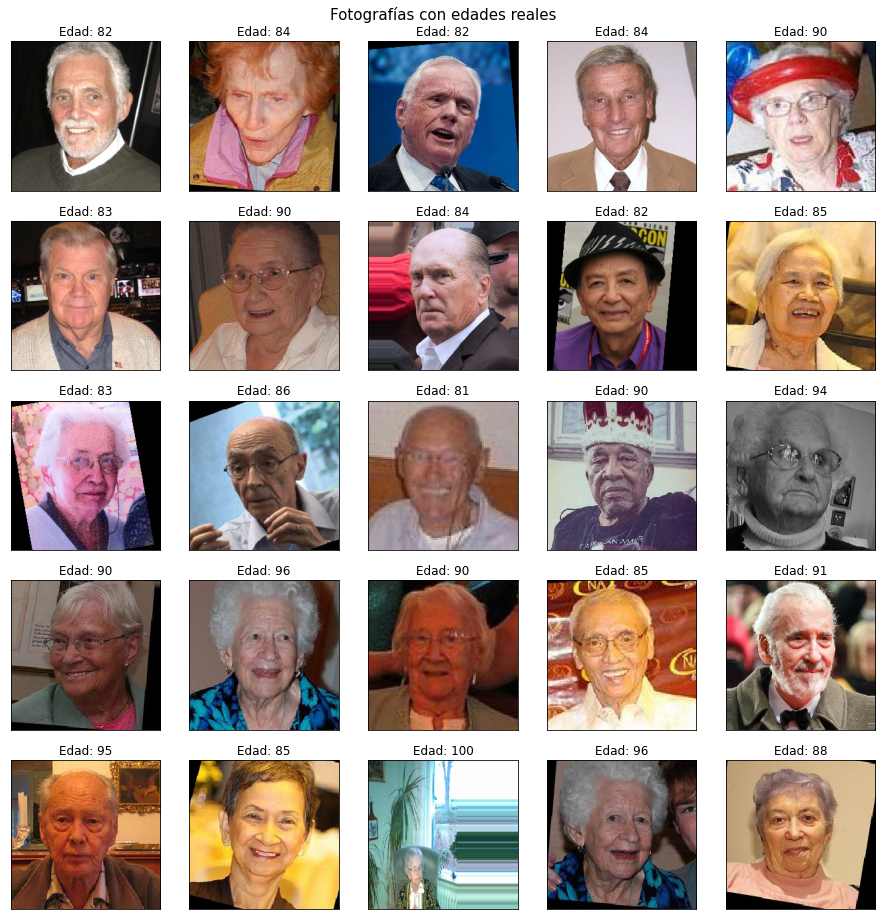

In [16]:
# Establecemos el tamaño de la figura
fig = plt.figure(figsize=(13,13))

# Mostraremos 25 imagenes del dataframe de personas mayores
for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.title(f'Edad: {target[i]}')
    # quitamos los ejes y colocamos las imágenes cerca para obtener un output más compacto
    plt.xticks([])
    plt.yticks([])
    plt.suptitle('Fotografías con edades reales', fontsize=15)
    plt.tight_layout()

### Fotos personas menores 10 años 

In [17]:
menores_flow = datagen.flow_from_dataframe(
        dataframe=menores,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 663 validated image filenames.


In [18]:
features, target = next(menores_flow)

/tmp/ipykernel_27/19159623.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(5, 5, i+1)


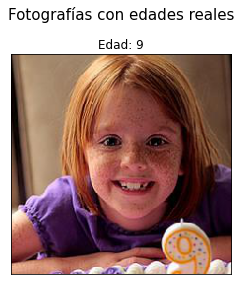

In [19]:
# Mostraremos 25 imagenes del dataframe de personas menores
for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.title(f'Edad: {target[i]}')
    # quitamos los ejes y colocamos las imágenes cerca para obtener un output más compacto
    plt.xticks([])
    plt.yticks([])
    plt.suptitle('Fotografías con edades reales', fontsize=15)
    plt.tight_layout()

### Conclusiones

Las imagenes concuerdan de acuerdo a las edades, no tenemos valores ausentes, ni valores duplicados, a pesar que se podria pensar que tenemos outliers, las edades concuerdan con las imagenes, por lo que no es necesario eliminar datos del conjunto.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Veo todo ok, buenas conclusiones y filtro de la data
</div>

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [ ]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset ='training',
        seed=12345) 

    return train_gen_flow

In [ ]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset ='validation',
        seed=12345) 

    return test_gen_flow

In [ ]:
def create_model(input_shape=(224, 224, 3)):
    
    """
    Define el modelo
    """
    backbone = ResNet50(input_shape=input_shape,
                        classes=1000,
                        include_top=False,
                        weights='imagenet')
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mae', optimizer=Adam(lr=0.0001), metrics=['mae'])

    return model

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data) 
        
   
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True)
   
    return model

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [ ]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = 'image_regressor'
"""
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

def load_train(path):
   
    
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset ='training',
        seed=12345) 

    return train_gen_flow
    
def load_test(path):

    
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset ='validation',
        seed=12345) 

    return test_gen_flow
    
def create_model(input_shape=(224, 224, 3)):

    backbone = ResNet50(input_shape=input_shape,
                        classes=1000,
                        include_top=False,
                        weights='imagenet')
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mae', optimizer=Adam(lr=0.0001), metrics=['mae'])

    return model
    
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data) 
        
   
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True)
   
    return model
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

Epoch 1/20  
178/178 - 46s - loss: 11.0957 - mae: 11.0967 - val_loss: 27.9378 - val_mae: 27.9543  
Epoch 2/20  
178/178 - 37s - loss: 6.7571 - mae: 6.7579 - val_loss: 20.5893 - val_mae: 20.5601  
Epoch 3/20  
178/178 - 38s - loss: 5.4458 - mae: 5.4463 - val_loss: 11.6935 - val_mae: 11.6363  
Epoch 4/20  
178/178 - 39s - loss: 4.7153 - mae: 4.7156 - val_loss: 7.8340 - val_mae: 7.8203  
Epoch 5/20  
178/178 - 37s - loss: 4.1796 - mae: 4.1799 - val_loss: 6.6517 - val_mae: 6.6680  
Epoch 6/20  
178/178 - 37s - loss: 3.8304 - mae: 3.8306 - val_loss: 6.3167 - val_mae: 6.3404  
Epoch 7/20  
178/178 - 37s - loss: 3.4244 - mae: 3.4245 - val_loss: 6.0560 - val_mae: 6.0803  
Epoch 8/20  
178/178 - 38s - loss: 3.1812 - mae: 3.1813 - val_loss: 6.4316 - val_mae: 6.4375  
Epoch 9/20  
178/178 - 38s - loss: 3.0720 - mae: 3.0720 - val_loss: 6.5916 - val_mae: 6.6040  
Epoch 10/20  
178/178 - 37s - loss: 2.8323 - mae: 2.8326 - val_loss: 6.3184 - val_mae: 6.3431  
Epoch 11/20  
178/178 - 37s - loss: 2.5561 - mae: 2.5560 - val_loss: 6.0910 - val_mae: 6.1079  
Epoch 12/20  
178/178 - 38s - loss: 2.5089 - mae: 2.5089 - val_loss: 6.0219 - val_mae: 6.0648  
Epoch 13/20  
178/178 - 38s - loss: 2.4017 - mae: 2.4016 - val_loss: 6.1901 - val_mae: 6.1962  
Epoch 14/20  
178/178 - 38s - loss: 2.2305 - mae: 2.2303 - val_loss: 6.2479 - val_mae: 6.2630  
Epoch 15/20  
178/178 - 38s - loss: 2.1623 - mae: 2.1623 - val_loss: 5.9321 - val_mae: 5.9427  
Epoch 16/20  
178/178 - 37s - loss: 2.1385 - mae: 2.1384 - val_loss: 5.9856 - val_mae: 5.9896  
Epoch 17/20  
178/178 - 38s - loss: 2.0534 - mae: 2.0535 - val_loss: 5.8813 - val_mae: 5.8965  
Epoch 18/20  
178/178 - 39s - loss: 2.1029 - mae: 2.1028 - val_loss: 6.3025 - val_mae: 6.3055  
Epoch 19/20  
178/178 - 37s - loss: 1.9343 - mae: 1.9343 - val_loss: 6.1826 - val_mae: 6.1935  
Epoch 20/20  
178/178 - 37s - loss: 1.9203 - mae: 1.9204 - val_loss: 5.8151 - val_mae: 5.8393  

## Conclusiones

Revisamos los datos para comprobar cuales eran las edades que contenia nuestro conjunto de datos, tanto en imagenes como las propias imagenes, observamos que contenian edades desde 1 año hasta los 100 años sin encontrar anomalias y viendo que las imagenes contenian la edad a la cual estaban ligadas.

Para el modelo utilizamos un modelo ResNet50 sencillo sin alguna capa extra, encontrando un valor de MAE - Error Absoluto Medio de 5.83, el cual es un resultado favorable, sin embargo, para el fin de este ejercicio no podriamos mandar este proyecto o marcarlo como viable ya que podriamos confundir las edades, en el mejor de los casos se puede confundir alguien que en realidad sea mayor y confundirlo con un menor - resolviendo las cosas con alguna identificacion, pero en caso contrario podemos confundir algun menor el cual seria un problema grave al no estar cumpliendo las normas o leyes del supermercado en donde se quisiera realizar el proyecto.

Esto se podria arreglar mejorando la metrica del proyecto, sin embargo, puede ser algo dificil al ser que todas las personas pueden aparentar tener un edad a la cual no corresponden y esto podria ser un ruido que no podriamos eliminarr al 100%

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Buenas conclusiones. Me parece tu solucion de identificacion seria la optimo. Sin embargo a veces conseguir esa data legar puede ser un lio. Me gusta como pensaste en el problema ! </div>

# Lista de control

- [x]  El Notebook estaba abierto 
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución
- [x]  Se realizó el análisis exploratorio de datos 
- [x]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [x]  El valor EAM del modelo no es superior a 8 
- [x]  El código de entrenamiento del modelo se copió en el notebook final 
- [x]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [x] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo